In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
df = pd.read_csv('Crop.csv')
data_shape = df.shape

# Visualize the data
data_head = df.head()

# Information of data
data_info = df.info()
data_shape, data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


((2200, 8),
     N   P   K  temperature   humidity        ph    rainfall label
 0  73  57  44    20.879744  82.002744  6.502985  202.935536  rice
 1  74  57  44    21.770462  80.319644  7.038096  226.655537  rice
 2  92  41  38    23.004459  82.320763  7.840207  263.964248  rice
 3  68  44  38    26.491096  80.158363  6.980401  242.864034  rice
 4  66  36  40    20.130175  81.604873  7.628473  262.717340  rice,
 None)

      Variable Outliers_Count        Mean        Std
0            N              0   49.992727  37.195854
1            P              0   53.300000  32.676122
2            K             90   48.169545  50.672493
3  temperature             33   25.616244   5.063749
4     humidity              0   71.481779  22.263812
5           ph             30    6.469480   0.773938
6     rainfall             22  103.463655  54.958389


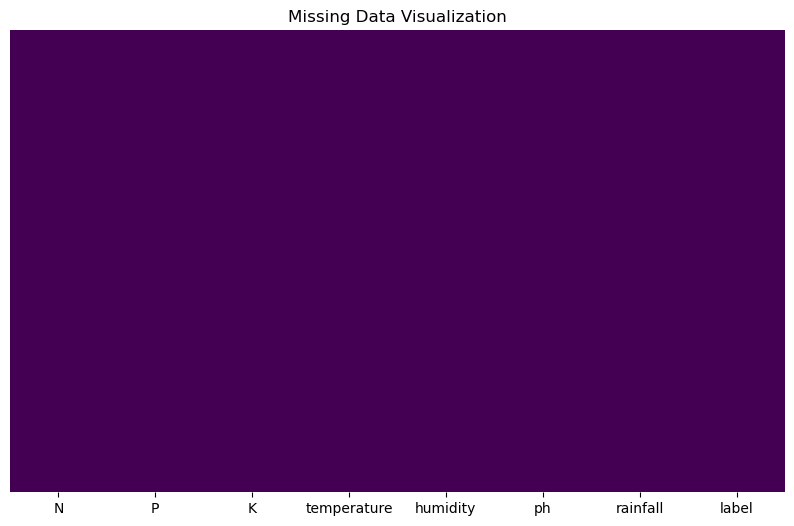

<Figure size 1500x1000 with 0 Axes>

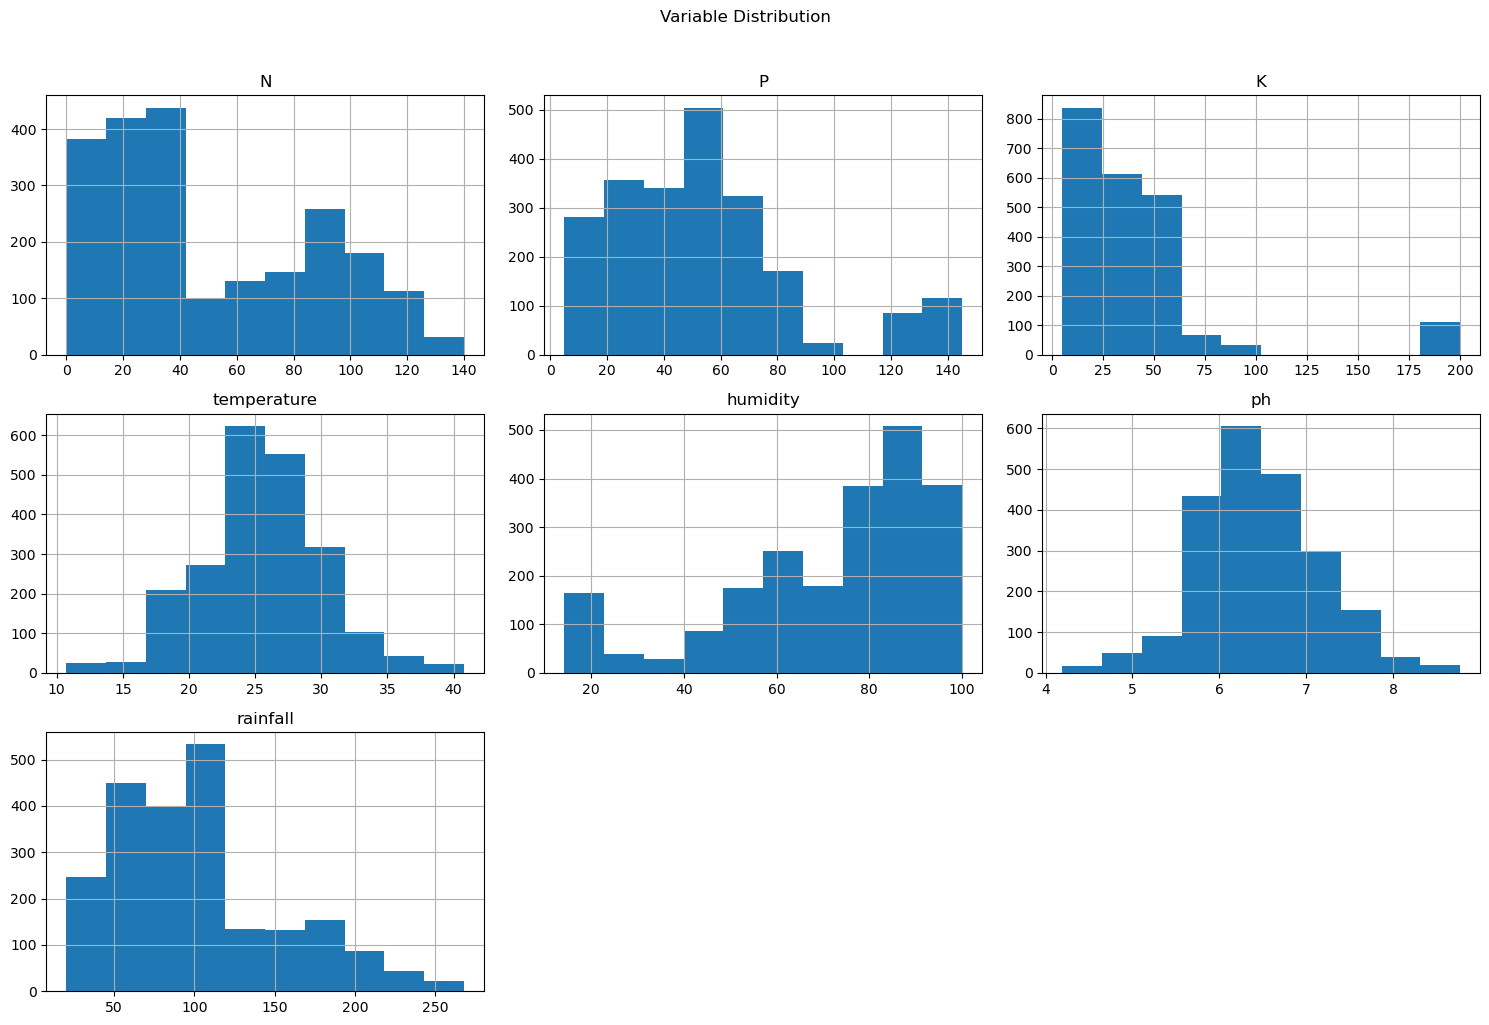

C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_14564\3478144947.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_annotated = ("Average Values:", df.mean())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_14564\3478144947.py:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values_annotated = ("Median Values:", df.median())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_14564\3478144947.py:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values_annotat

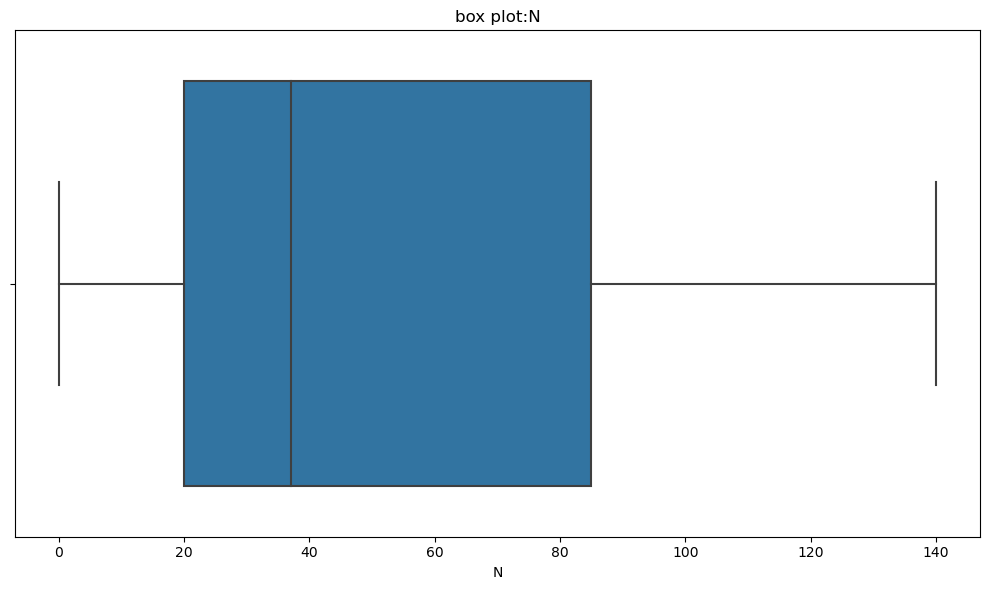

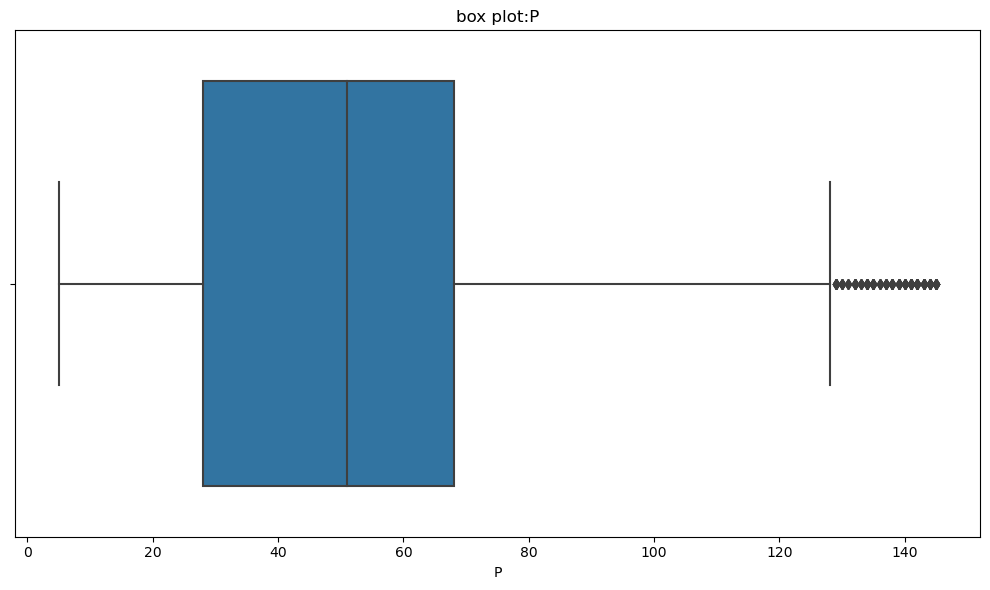

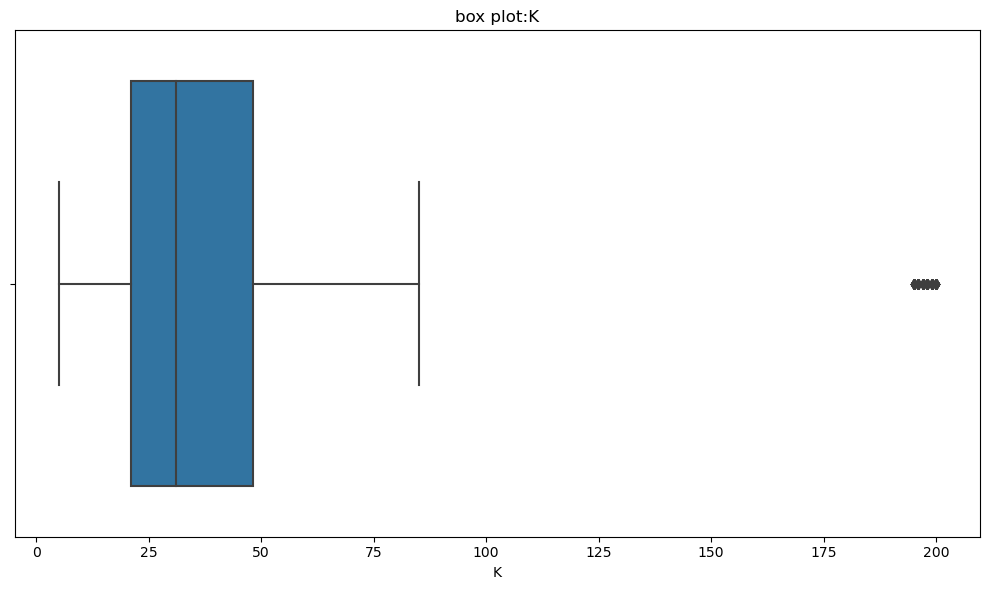

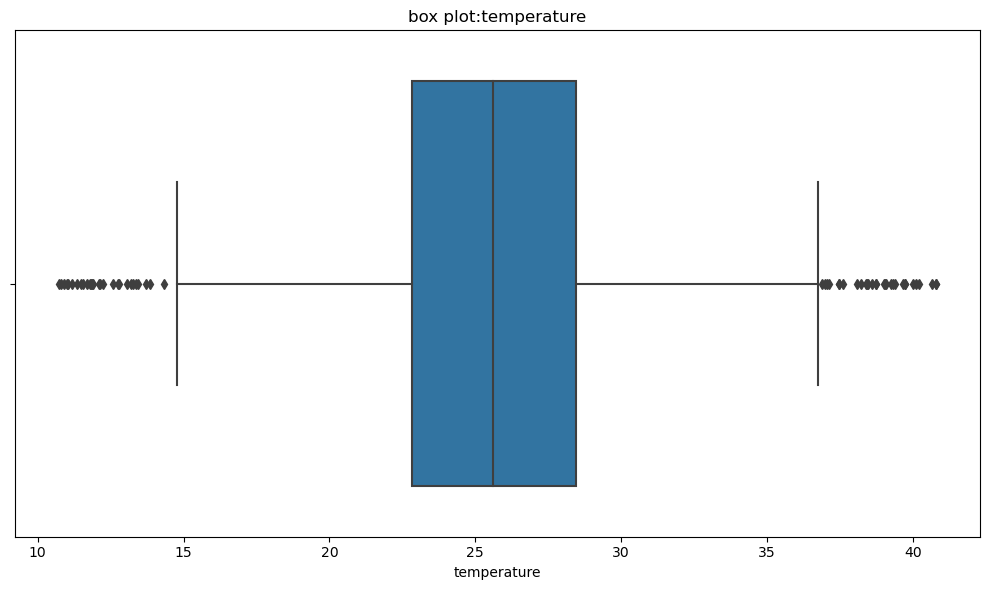

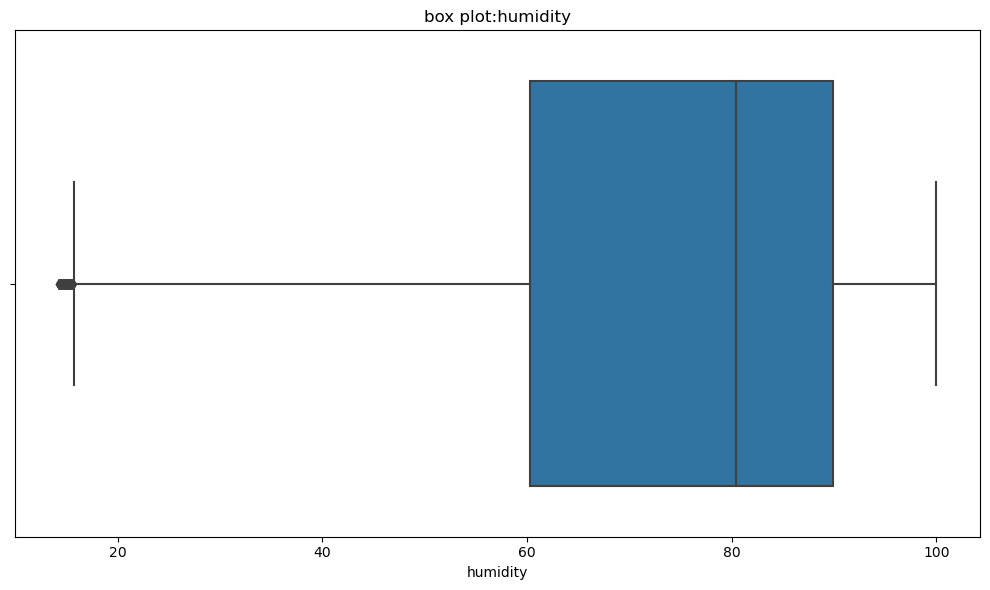

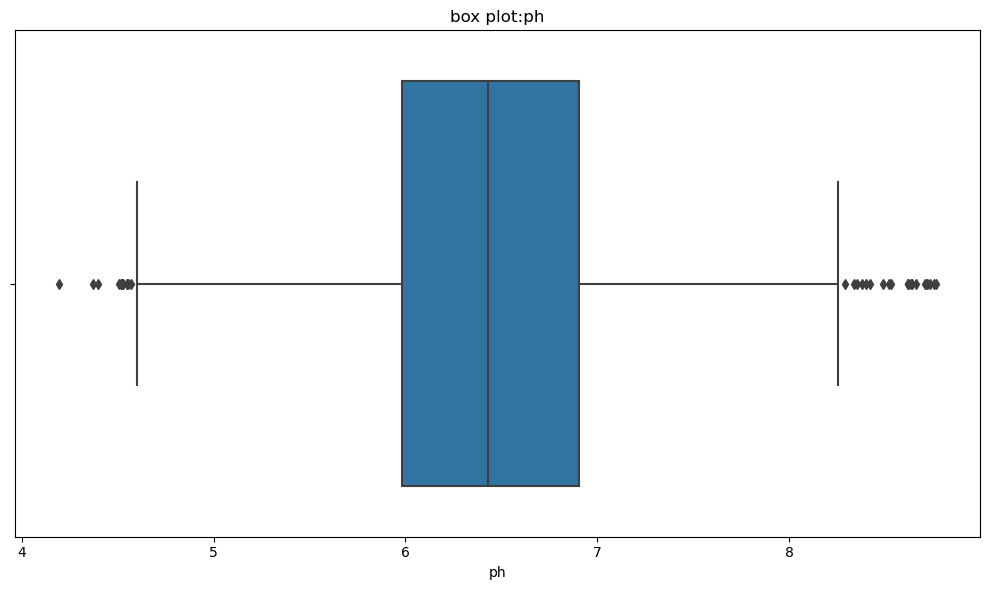

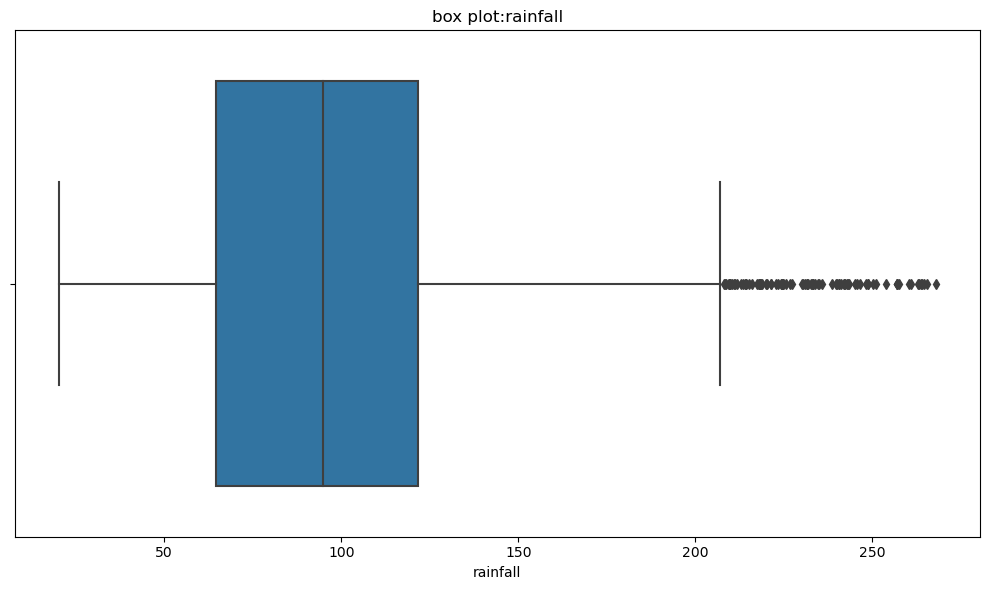

In [2]:
# Identify and replace outliers for each numerical variable
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Initializes a DataFrame to store information about outliers
outliers_info = pd.DataFrame(columns=['Variable', 'Outliers_Count', 'Mean', 'Std'])

# For each numeric variable, replace the outlier with the mean
for column in numeric_columns:
    mean_value = df[column].mean()
    std_value = df[column].std()
    # Identify outliers
    outliers = (df[column] < mean_value - 3*std_value) | (df[column] > mean_value + 3*std_value)
    # Store information about outliers
    temp_df = pd.DataFrame({
        'Variable': [column], 
        'Outliers_Count': [outliers.sum()], 
        'Mean': [mean_value], 
        'Std': [std_value]
    })
    outliers_info = pd.concat([outliers_info, temp_df], ignore_index=True)
    # Replace outliers with the mean
    df.loc[outliers, column] = mean_value

# Displays information about outliers
print(outliers_info)


# Missing data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Variable distribution
features = df.drop("label", axis=1)
plt.figure(figsize=(15, 10))
features.hist(figsize=(15, 10))
plt.suptitle('Variable Distribution', y=1.02)
plt.tight_layout()
plt.show()

# Mean, Median, Mode, Variance
mean_values_annotated = ("Average Values:", df.mean())
median_values_annotated = ("Median Values:", df.median())
mode_values_annotated = ("Mode Values:", df.mode().iloc[0])
variance_values_annotated = ("Variance Values:", df.var())

mean_values_annotated, median_values_annotated, mode_values_annotated, variance_values_annotated


for column in features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=features[column])
    plt.title(f'box plot:{column}')
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes

print(df.head())

X = df.drop(["label", "label_code"], axis=1)
y = df['label_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Convert standardized data back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the head of the standardized data
print(X_train_scaled_df.head())


# Only transform the test data
X_test_scaled = scaler.transform(X_test)

train_test_shapes_annotated = ("Training data shape (features):", X_train.shape, 
                              "Training data shape (labels):", y_train.shape,
                              "Test data shape (features):", X_test.shape,
                              "Test data shape (labels):", y_test.shape)

train_test_shapes_annotated

      N     P     K  temperature   humidity        ph    rainfall label  \
0  73.0  57.0  44.0    20.879744  82.002744  6.502985  202.935536  rice   
1  74.0  57.0  44.0    21.770462  80.319644  7.038096  226.655537  rice   
2  92.0  41.0  38.0    23.004459  82.320763  7.840207  263.964248  rice   
3  68.0  44.0  38.0    26.491096  80.158363  6.980401  242.864034  rice   
4  66.0  36.0  40.0    20.130175  81.604873  7.628473  262.717340  rice   

   label_code  
0          20  
1          20  
2          20  
3          20  
4          20  
          N         P         K  temperature  humidity        ph  rainfall
0 -0.567813 -1.379744 -0.770755    -1.948928  0.936586  0.232573  0.040927
1 -0.326838  0.113219 -0.448555     0.439974 -0.100470  0.963872 -0.606731
2 -0.594588  0.052281 -0.671617     0.435261 -0.382775  1.167169 -1.074104
3  1.011914  0.844465  0.270199    -0.027892  0.157688 -0.631946  0.303752
4 -0.594588 -0.922714 -0.423771     2.139552 -1.071303 -0.256090 -0.058600


('Training data shape (features):',
 (1760, 7),
 'Training data shape (labels):',
 (1760,),
 'Test data shape (features):',
 (440, 7),
 'Test data shape (labels):',
 (440,))

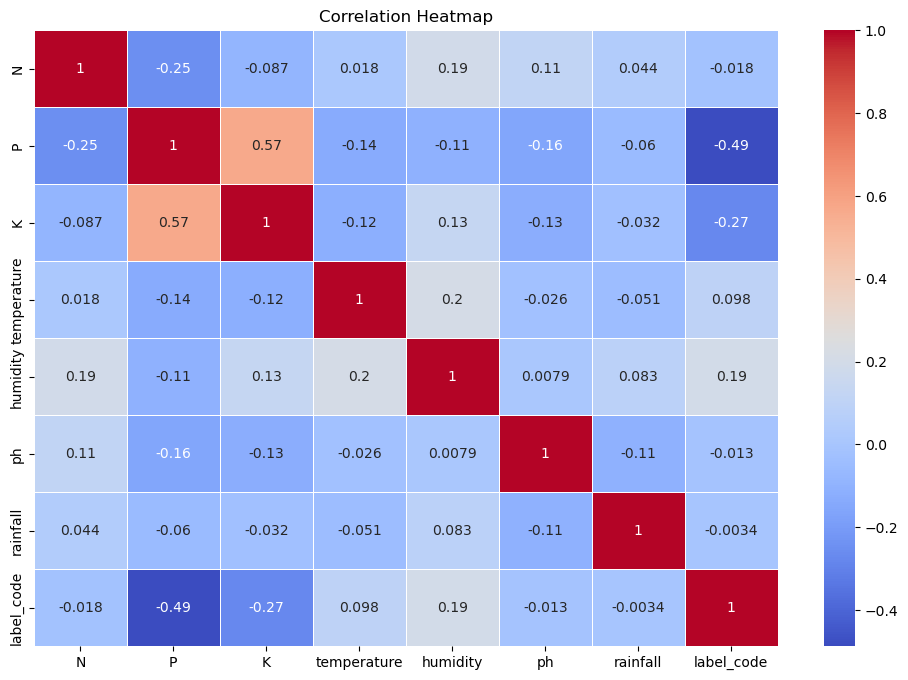

('Correlation with label_code:',
 N             -0.018124
 P             -0.486877
 K             -0.274366
 temperature    0.098416
 humidity       0.193911
 ph            -0.012867
 rainfall      -0.003406
 label_code     1.000000
 Name: label_code, dtype: float64)

In [4]:

correlation = df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


label_correlation_annotated = ("Correlation with label_code:", correlation['label_code'])

label_correlation_annotated

In [5]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy_annotated = ("Accuracy of SVM Model:", accuracy_score(y_test, y_pred))

accuracy_annotated

('Accuracy of SVM Model:', 0.9727272727272728)

In [6]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# accuracies = []

# for kern in kernels:
#     # Train the SVM model with the current kernel
#     svm_model = SVC(kernel=kern, random_state=42)
#     svm_model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = svm_model.predict(X_test)
    
#     # Calculate the accuracy
#     acc = accuracy_score(y_test, y_pred)
#     accuracies.append((kern, acc))

# # Display the accuracies
# for kern, acc in accuracies:
#     print(f"Accuracy using {kern} kernel: {acc:.4f}")


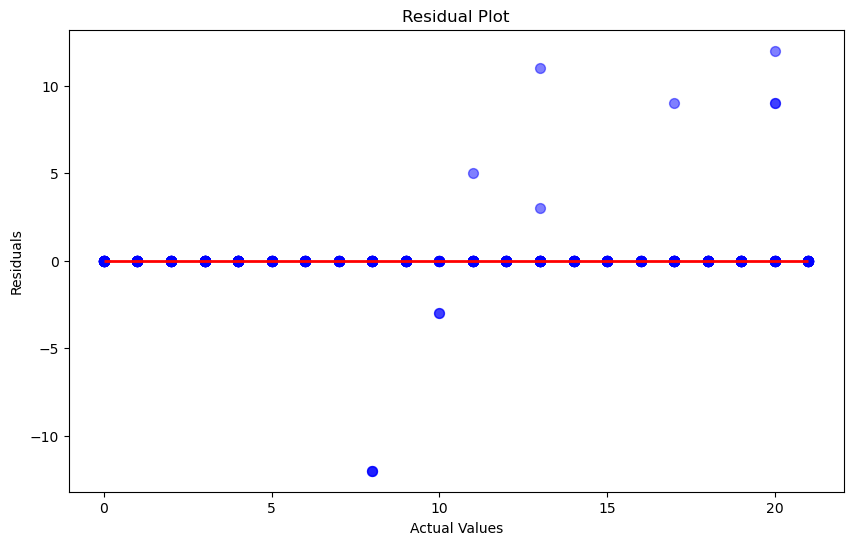

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', s=50, alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), colors='red', linewidths=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


F1 Score: 0.9709023790590795


C:\Users\ALIENWARE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


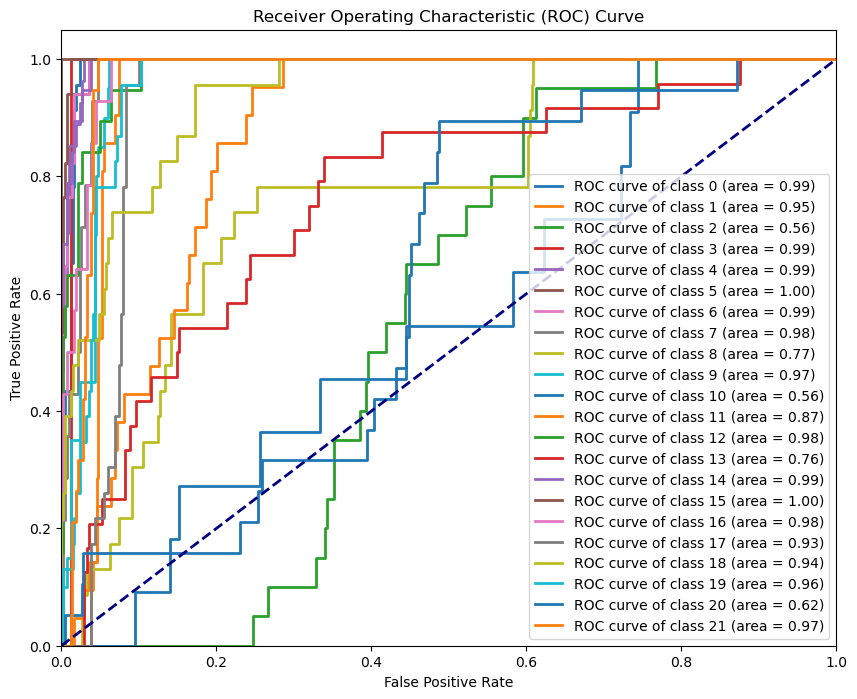

In [8]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# F1
f1 = f1_score(y_test, y_pred, average='macro') # 'macro'适用于多类分类
print("F1 Score:", f1)

# ROC

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = svm_model.decision_function(X_test_scaled)

n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

